# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar notación científica
pd.options.display.float_format = '{:,.2f}'.format

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'E:/alex/03_MACHINE_LEARNING/08_CASOS//03_SCORING RIESGOS'

Sustituir el nombre_fichero_datos.

In [3]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [4]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id_cliente')
df

,Unnamed: 0,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,0,Hvac technician,3 years,"54,000.00",Source Verified,A,19.31,MORTGAGE,2.00,10.00,...,NaN,NaN,debt_consolidation,"15,000.00",7.21,36 months,464.60,"2,669.06",Current,0.00
4798121,1,"Target Promotions and Marketing,Inc",10+ years,"65,000.00",Not Verified,D,25.40,RENT,1.00,15.00,...,NaN,NaN,debt_consolidation,"10,000.00",17.77,36 months,360.38,"6,362.96",Charged Off,0.00
46641215,2,Banker,5 years,"135,000.00",Verified,A,14.68,RENT,0.00,19.00,...,NaN,NaN,debt_consolidation,"24,000.00",6.39,36 months,734.38,"24,000.00",Fully Paid,0.00
87998444,3,executive director,9 years,"188,000.00",Source Verified,B,11.69,MORTGAGE,3.00,15.00,...,NaN,NaN,credit_card,"27,000.00",8.99,60 months,560.35,"12,443.00",Current,0.00
132883631,4,Subsea Technician,7 years,"125,000.00",Source Verified,B,9.00,MORTGAGE,1.00,6.00,...,NaN,NaN,debt_consolidation,"22,000.00",10.90,36 months,719.22,"22,000.00",Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999338,199991,T. Rowe Price,4 years,"55,000.00",Verified,B,29.26,RENT,NaN,7.00,...,NaN,Borrower added on 11/01/11 > Looking to use ...,debt_consolidation,"20,000.00",12.69,60 months,451.90,"20,000.00",Fully Paid,0.00
73222117,199992,Executive Assistant,10+ years,"85,000.00",Verified,B,33.05,RENT,1.00,25.00,...,NaN,NaN,debt_consolidation,"3,000.00",9.75,36 months,96.45,"3,000.00",Fully Paid,0.00
51876926,199995,Office Manager,10+ years,"42,000.00",Not Verified,C,20.85,MORTGAGE,6.00,9.00,...,NaN,NaN,debt_consolidation,"8,000.00",12.29,36 months,266.83,"8,000.00",Fully Paid,0.00


## VISIÓN GENERAL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 137387967 to 94394801
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140000 non-null  int64  
 1   empleo                       129693 non-null  object 
 2   antigüedad_empleo            130954 non-null  object 
 3   ingresos                     140000 non-null  float64
 4   ingresos_verificados         140000 non-null  object 
 5   rating                       140000 non-null  object 
 6   dti                          139895 non-null  float64
 7   vivienda                     140000 non-null  object 
 8   num_hipotecas                136900 non-null  float64
 9   num_lineas_credito           139999 non-null  float64
 10  porc_tarjetas_75p            135308 non-null  float64
 11  porc_uso_revolving           139891 non-null  float64
 12  num_cancelaciones_12meses    139993 non-null  fl

### Corrección

Eliminar la variable Unnamed: 0

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

## TIPOS DE DATOS

### Identificación

In [8]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
id_prestamo                    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

Conclusiones:

* Todo correcto en cuanto a tipo de datos

## VALORES ÚNICOS

### Identificación

In [14]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
vivienda                           6
num_cancelaciones_12meses          7
rating                             7
estado                             9
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  20
num_hipotecas                     24
num_lineas_credito                61
num_meses_desde_ult_retraso      132
porc_tarjetas_75p                165
tipo_interes                     580
porc_uso_revolving              1102
principal                       1471
dti                             5309
descripcion                     7747
imp_recuperado                 10666
ingresos                       11659
imp_cuota                      33599
empleo                         54492
imp_amortizado                 57818
dtype: int64

Conclusiones:

* id_prestamo con menos de 2 valores --> eliminar

### Corrección

In [18]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICADOS

### Identificación

In [19]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [11]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [12]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [22]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132227
empleo                   10307
antigüedad_empleo         9046
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [23]:
cat.descripcion.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [24]:
cat.empleo.value_counts(dropna=False)

NaN                             10307
Teacher                          2457
Manager                          2201
Owner                            1359
Registered Nurse                 1011
                                ...  
HST                                 1
Clinical Nurse                      1
Parademic                           1
IT HelpDesk Manager                 1
Immigration Senior Paralegal        1
Name: empleo, Length: 54558, dtype: int64

In [25]:
cat.antigüedad_empleo.value_counts(dropna=False)

10+ years    46191
2 years      12646
< 1 year     11835
3 years      11256
1 year        9120
NaN           9046
5 years       8760
4 years       8445
6 years       6235
7 years       5782
8 years       5776
9 years       4908
Name: antigüedad_empleo, dtype: int64

Conclusiones:

* sustituir todas por valor 'desconocido'

#### Corrección

##### Imputar por un valor

###### Variables a imputar

In [26]:
var_imputar_desconocido = ['descripcion','empleo','antigüedad_empleo']

###### Imputar

In [27]:
cat[var_imputar_desconocido] = cat[var_imputar_desconocido].fillna('desconocido')

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [26]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71800
porc_tarjetas_75p               4638
num_hipotecas                   3081
porc_uso_revolving               115
dti                              108
num_cancelaciones_12meses          7
num_lineas_credito                 2
num_derogatorios                   2
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

Veamoslas con más detalle.

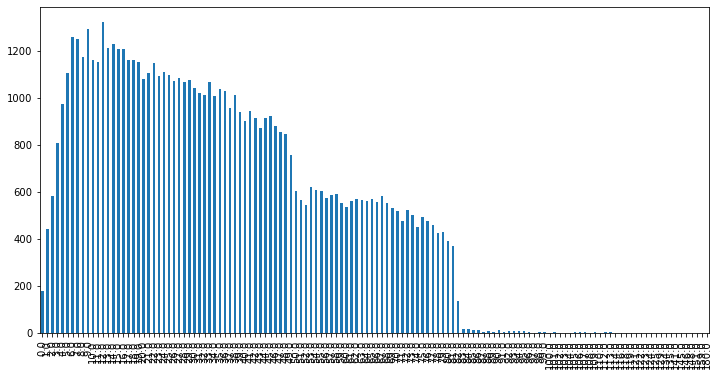

In [27]:
num.num_meses_desde_ult_retraso.value_counts().sort_index().plot.bar(figsize = (12,6));

Hay ceros, pero parecen pocos para una variable que implica retrasos.

Así que vamos a pensar que los nulos significan que no ha habido retrasos.

Y por tanto imputar por ceros.

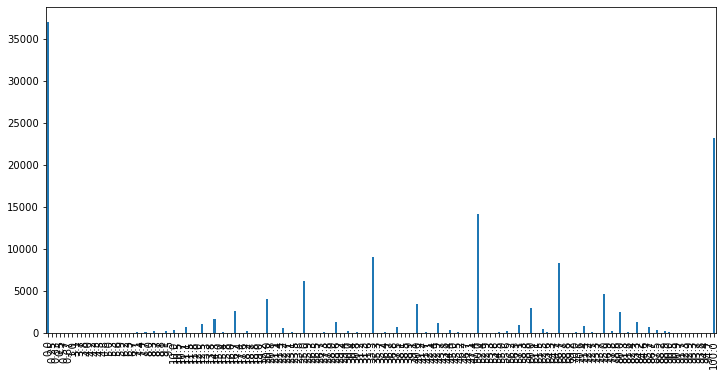

In [34]:
num.porc_tarjetas_75p.value_counts().sort_index().plot.bar(figsize = (12,6));

La categoría mayoritaria es cero.

Imputaremos por cero.

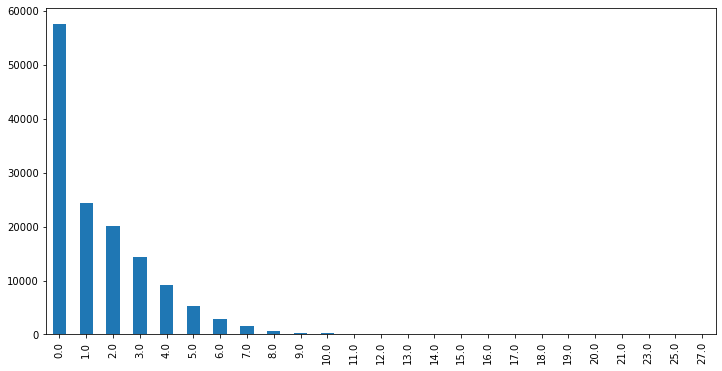

In [35]:
num.num_hipotecas.value_counts().sort_index().plot.bar(figsize = (12,6));

In [20]:
num.porc_uso_revolving.value_counts().sort_index()

0.00      817
0.10       96
0.20       80
0.30       80
0.40       85
         ... 
126.60      1
155.30      1
158.70      1
184.60      1
366.60      1
Name: porc_uso_revolving, Length: 1095, dtype: int64

In [22]:
num.dti.value_counts().sort_index()

-1.00       1
0.00      117
0.01        1
0.02        1
0.04        2
         ... 
564.00      1
580.20      1
756.46      1
819.96      1
999.00      8
Name: dti, Length: 5302, dtype: int64

La categoría mayoritaria es cero.

Imputaremos por cero.

Conclusiones:

* imputar todas por ceros

#### Corrección

In [36]:
num.fillna(0,inplace=True)

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [37]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [38]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [39]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts().sort_index())

###### Variables a aplicar

In [40]:
var_atipicos_dt = ['ingresos','principal','imp_cuota','imp_recuperado']

###### Aplicar

In [41]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ingresos:

420,000.00       8
422,000.00       1
422,550.00       1
423,000.00       1
424,000.00       2
                ..
7,845,315.00     1
8,500,000.00     1
8,500,021.00     1
9,550,000.00     1
10,999,200.00    1
Name: ingresos, Length: 143, dtype: int64

principal:

Series([], Name: principal, dtype: int64)

imp_cuota:

1,516.27    2
1,587.02    1
1,607.80    1
1,714.54    1
Name: imp_cuota, dtype: int64

imp_recuperado:

3,231.13     1
3,231.66     1
3,231.98     1
3,232.41     1
3,233.33     1
            ..
26,172.99    1
27,478.64    1
27,657.68    1
33,407.16    1
33,666.34    1
Name: imp_recuperado, Length: 1582, dtype: int64


Revisamos con más detalle la variable ingresos.

In [45]:
num.ingresos.describe()

count      140,000.00
mean        78,185.50
std         84,341.87
min              0.00
25%         46,000.00
50%         65,000.00
75%         93,463.00
max     10,999,200.00
Name: ingresos, dtype: float64

##### Corrección

Eliminar los registros con ingresos superiores a 300.000$

*Cuidado: Si se eliminan registros hay que eliminarlos tanto de cat como de num*

###### Id de registros a eliminar

In [51]:
a_eliminar = num.loc[num.ingresos > 300000].index.values
a_eliminar

array([115087816,  30115373,  88149047,  58654033,  96702950,  70180828,
       128295694,  57316403,  75468055,  55380417,  68355962,  59101444,
        74703269,  26329813, 101561119, 114093587, 121891976,  70701688,
        91162705,  69967314,  69127903, 134144676,  79015002,  33371205,
        88195703, 114793732, 115048244,   9746316,  89794872,  93634763,
        75358546,  65038134,  70592833,  77517938,  93092543,  91131807,
          489907,  57074442, 133401013,  60831304,  40942257,  79492925,
       115085050,   3630153,  79390430, 141591423,  67427919,  92659557,
       138925364, 125219862,  88921166,  65087421,  18895853, 109743090,
       131383380, 109322909,  92035926,  60873988,  12938159, 107355068,
       104110402,  65795964,  59242936, 132251779,   4044958, 134479546,
       134323203, 104319520, 145242693,   2367546,  96979795,    620850,
        40385541,  74585468, 143147174, 124877413, 125330617, 122347658,
       140598256, 103337282,   1533286,   2092000, 

###### Aplicar

In [52]:
cat = cat[~cat.index.isin(a_eliminar)]
num = num[~num.index.isin(a_eliminar)]

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [53]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [54]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)